In [2]:
from citipy import citipy
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import api_keys
import json

In [3]:
randCity = []
randCountry = []
loopcnt = 0

while len(randCity) < 500 :
    loopcnt +=1
    
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    
    city = citipy.nearest_city(lat, lng)
    
    foundCity = False
    for j in range(len(randCity)):
        if city.city_name == randCity[j]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "3f85cb5ef7f787c45d7032e2ac4fbc69"
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [9]:
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin Data Retrieval")
print("---------------------------------------")
for city in randCity:
    searchCnt += 1
    response = requests.get(query_url + city).json()
    if response.get("id"):
        print(f"Processing Record for city: {city}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"{city} not found. Skipping...")
          
print("---------------------------------------")
print("Processing Complete")

Begin Data Retrieval
---------------------------------------
Processing Record for city: veraval
Processing Record for city: wageningen
Processing Record for city: elk point
Processing Record for city: colombo
Processing Record for city: esfahan
Processing Record for city: ribeira grande
Processing Record for city: tateyama
Processing Record for city: gretna
Processing Record for city: beringovskiy
Processing Record for city: adrar
Processing Record for city: bluefields
Processing Record for city: east london
Processing Record for city: chokurdakh
Processing Record for city: san patricio
Processing Record for city: deputatskiy
Processing Record for city: fayaoue
Processing Record for city: turukhansk
Processing Record for city: tuktoyaktuk
Processing Record for city: ponta do sol
grand river south east not found. Skipping...
Processing Record for city: yulara
Processing Record for city: porosozero
Processing Record for city: nikolskoye
Processing Record for city: lavrentiya
Processing 

illoqqortoormiut not found. Skipping...
Processing Record for city: ahipara
tsihombe not found. Skipping...
Processing Record for city: rypefjord
Processing Record for city: vieira de leiria
sentyabrskiy not found. Skipping...
Processing Record for city: sao filipe
Processing Record for city: bridlington
Processing Record for city: labuhan
Processing Record for city: marathon
Processing Record for city: jalu
ishlei not found. Skipping...
Processing Record for city: hami
Processing Record for city: aykhal
Processing Record for city: kruisfontein
Processing Record for city: neuquen
Processing Record for city: gwadar
Processing Record for city: agadez
takob not found. Skipping...
Processing Record for city: salalah
Processing Record for city: qasigiannguit
Processing Record for city: teknaf
Processing Record for city: port augusta
Processing Record for city: boone
Processing Record for city: ternate
tatawin not found. Skipping...
aybak not found. Skipping...
Processing Record for city: ca

Processing Record for city: varkkallai
Processing Record for city: lingyuan
Processing Record for city: terrak
Processing Record for city: tromso
Processing Record for city: cidreira
Processing Record for city: dubovka
toliary not found. Skipping...
Processing Record for city: sar-e pul
Processing Record for city: kodinsk
Processing Record for city: ust-maya
Processing Record for city: ambilobe
Processing Record for city: russell
Processing Record for city: kristianstad
Processing Record for city: nehe
Processing Record for city: kavieng
Processing Record for city: baruun-urt
Processing Record for city: bartica
Processing Record for city: scarborough
Processing Record for city: nago
Processing Record for city: bull savanna
Processing Record for city: alice springs
Processing Record for city: loutros
Processing Record for city: xuddur
Processing Record for city: aran
haibowan not found. Skipping...
Processing Record for city: egvekinot
Processing Record for city: nuuk
Processing Record 

In [10]:
lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [11]:
weather_data = pd.DataFrame({"city":cityList,
                            "cloudiness":cloud_data,
                            "country":countryList,
                            "humidity":humid_data,
                            "lat":lat_data,
                            "lng":lng_data,
                            "max temp":temp_data,
                            "wind speed":wind_data})

In [12]:
weather_data = weather_data[["city","cloudiness","country","humidity","lat","lng","max temp","wind speed"]]
weather_data.head()

,city,cloudiness,country,humidity,lat,lng,max temp,wind speed
0,veraval,90,in,100,49.65,0.71,35.01,8.05
1,wageningen,0,sr,92,51.98,5.66,29.17,3.36
2,elk point,90,ca,57,53.90,-110.90,-7.61,10.29
3,colombo,0,lk,83,6.93,79.85,73.40,13.87
4,esfahan,0,ir,68,32.66,51.68,26.60,9.17


In [13]:
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)

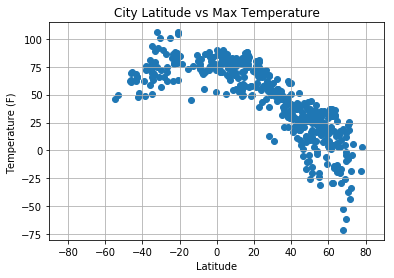

In [14]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Lat_vs_MaxTemp.png")

plt.show()

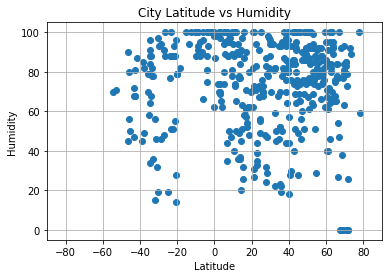

In [15]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Lat_vs_Humidity.png")

plt.show()

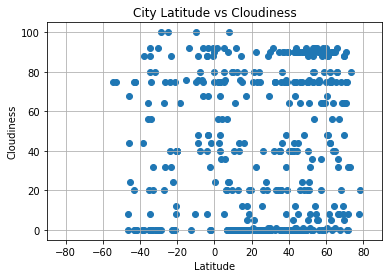

In [16]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Lat_vs_Cloudiness.png")

plt.show()

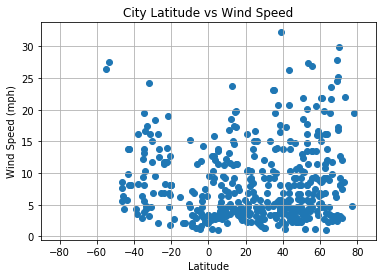

In [17]:
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

plt.savefig("Lat_vs_WindSpeed.png")

plt.show()

In [ ]:
#      There appears to be a negative coorelation between Latitude and Temperature. The higher the latitude,
# the lower the temperature
#      Using the eye test, there doesn't seem to be any coorelation in the other three charts. The points
# seem to be scattered without a clear slope.
#      Generally speaking, humidity rarely tends to be low, wind speed is often low, and cloudiness can either be 
# non-existent or very high.